# Are Relations Relevant in CNNs? *A Study Based on a Facial Dataset*

## Testing CNN with Features Closer Together *(20 Epochs - 15 Layers)*

### Imports, Seed, GPU integration

In [1]:
import numpy as np
import random
import tensorflow as tf

In [2]:
# Seeds for better reproducibility
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [4]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


### Data preparation

In [5]:
test_path = '../../../picasso_dataset/FCT-data/shifted/test'

In [6]:
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['no_face', 'face'], batch_size=10, shuffle=False)

Found 3000 images belonging to 2 classes.


In [7]:
assert test_batches.n == 3000
assert test_batches.num_classes == 2

### Loading the trained CNN

In [8]:
filename='../models/CNN-FCT-20E-15L-02.h5'
loaded_model = load_model(filename)

### Accuracy and loss of the trained model

In [9]:
scores = loaded_model.evaluate(test_batches, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("Loss: %.2f%%" % (scores[0]*100))

300/300 - 7s - loss: 0.2156 - accuracy: 0.9153
Accuracy: 91.53%
Loss: 21.56%


### Testing the CNN

In [10]:
predictions = loaded_model.predict(x=test_batches, steps=len(test_batches), verbose=0)

### Index of wrongly predicted pictures

In [11]:
y_true=test_batches.classes
y_pred=np.argmax(predictions, axis=-1)
cm = confusion_matrix(y_true = y_true, y_pred = y_pred)

In [12]:
face_but_predicted_no_face=[]
no_face_but_predicted_face=[]

for i in range(len(predictions)):
        if y_true[i] != y_pred[i]:
            if y_true[i] == 1:
                face_but_predicted_no_face.append(i+8001-1500) #Index of file on disk
            else:
                no_face_but_predicted_face.append(i+8001) #Index of file on disk

print("Data from class 'face', that was wrongly predicted as 'no-face' [", len(face_but_predicted_no_face), "] :")
print(face_but_predicted_no_face)
print("----------------------------------------------------------------------------------------------")
print("Data from class 'no-face', that was wrongly predicted as 'face' [", len(no_face_but_predicted_face), "] :")
print(no_face_but_predicted_face)

Data from class 'face', that was wrongly predicted as 'no-face' [ 221 ] :
[8005, 8010, 8012, 8020, 8023, 8034, 8035, 8039, 8054, 8056, 8095, 8108, 8113, 8120, 8133, 8136, 8137, 8146, 8153, 8160, 8179, 8194, 8197, 8200, 8207, 8217, 8225, 8238, 8246, 8266, 8291, 8293, 8295, 8302, 8304, 8309, 8318, 8324, 8326, 8331, 8343, 8354, 8362, 8366, 8370, 8375, 8382, 8402, 8406, 8409, 8411, 8434, 8435, 8440, 8449, 8476, 8478, 8487, 8490, 8494, 8496, 9002, 9005, 9008, 9009, 9014, 9016, 9019, 9020, 9023, 9024, 9025, 9029, 9032, 9033, 9034, 9035, 9038, 9045, 9049, 9053, 9058, 9066, 9072, 9075, 9078, 9080, 9085, 9088, 9095, 9098, 9100, 9101, 9102, 9104, 9106, 9108, 9113, 9114, 9115, 9116, 9118, 9119, 9120, 9121, 9130, 9135, 9136, 9142, 9145, 9151, 9155, 9158, 9168, 9170, 9173, 9174, 9176, 9181, 9183, 9184, 9194, 9200, 9202, 9208, 9210, 9211, 9218, 9220, 9223, 9232, 9236, 9239, 9243, 9248, 9250, 9251, 9253, 9259, 9261, 9263, 9264, 9265, 9266, 9269, 9270, 9272, 9273, 9275, 9277, 9279, 9280, 9281, 9282, 9

### Confusion matrix

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [14]:
test_batches.class_indices

{'no_face': 0, 'face': 1}

Confusion matrix, without normalization
[[1467   33]
 [ 221 1279]]


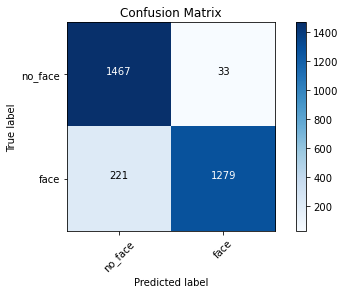

In [15]:
cm_plot_labels = ['no_face','face']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')